## Creating the matrix

In [2]:
import csv
from rdflib import Graph, Literal, URIRef
from rdflib.namespace import RDFS,FOAF,OWL
from langdetect import detect
import pandas as pd
import nltk
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import community
import collections
from operator import itemgetter
from networkx.algorithms import community

In [4]:
musicList = []
recommendationDict = {}
with open('MusicDB.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        musicList.append(row['title'])
        recommendationDict[row['title']] = row['recommendations']
print(len(musicList))

431


In [5]:
matrix = np.empty((len(musicList), len(musicList)), dtype=int)

for i in range(len(musicList)):
    for j in range(len(musicList)):
        flag = 0
        for key in recommendationDict.keys():
            songs= recommendationDict[key].split(";")
            for s in songs:
                #print(s)
                if key == musicList[i] and s == musicList[j]:
                    flag = 1
        matrix[i][j] = flag
            
df = pd.DataFrame(matrix, index=musicList, columns=musicList)

In [49]:
df

,Lose Yourself,Umbrella,Poker Face,Hey Ya!,Yeah!,In Da Club,I Gotta Feeling,Big Girls Don't Cry,Low (Feat. T-Pain) (Album Version),Beautiful Girls,...,Pretend,Love Me Tender,Tammy,Rags To Riches,Bye Bye Love,It's All in the Game,The Three Bells,Blue Suede Shoes,Long Tall Sally,Cara Mia
Lose Yourself,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Umbrella,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Poker Face,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hey Ya!,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yeah!,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
It's All in the Game,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
The Three Bells,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Blue Suede Shoes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
Long Tall Sally,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [6]:
df.to_csv(r'matrix.csv', index = True, header=True, encoding='utf-8')

In [7]:
G=nx.from_numpy_matrix(matrix)

labels = {}
i=0
for song in musicList:
    labels[i]=song
    i +=1
print (labels)

H = nx.relabel_nodes(G, labels) # H is the same Graph as G, just with labels

G.nodes()
G.edges()

{0: 'Lose Yourself', 1: 'Umbrella', 2: 'Poker Face', 3: 'Hey Ya!', 4: 'Yeah!', 5: 'In Da Club', 6: 'I Gotta Feeling', 7: "Big Girls Don't Cry", 8: 'Low (Feat. T-Pain) (Album Version)', 9: 'Beautiful Girls', 10: 'SexyBack', 11: 'Crazy In Love', 12: "Can't Get You out of My Head", 13: 'How You Remind Me', 14: 'Hung Up', 15: 'Music', 16: 'Girlfriend', 17: 'Whenever Wherever', 18: 'Apologize', 19: "Don't Cha", 20: 'JUST DANCE', 21: 'Bad Romance', 22: 'All The Things She Said', 23: 'So What', 24: 'Beautiful Day', 25: 'Crazy', 26: "You're Beautiful", 27: 'Complicated', 28: 'Beautiful Liar', 29: '4 Minutes', 30: 'Beautiful', 31: 'No One', 32: 'Bring Me To Life', 33: 'Hot N Cold', 34: 'Right Round', 35: 'Toxic', 36: 'Bad Day', 37: 'Boom Boom Pow', 38: "Don't Stop The Music", 39: 'We Belong Together', 40: 'Boulevard Of Broken Dreams', 41: 'Stronger', 42: 'Lonely', 43: 'Bye Bye Bye', 44: 'Promiscuous', 45: 'Say It Right', 46: 'Shut Up', 47: 'A Thousand Miles', 48: 'The Way I Are', 49: 'Gold Digg

EdgeView([(0, 4), (0, 5), (0, 8), (0, 11), (0, 19), (0, 25), (0, 42), (0, 46), (0, 48), (0, 49), (0, 58), (0, 59), (0, 60), (0, 61), (0, 68), (0, 75), (0, 76), (1, 3), (1, 28), (1, 34), (1, 38), (1, 39), (1, 41), (1, 50), (1, 51), (1, 57), (1, 69), (1, 73), (2, 10), (2, 14), (2, 20), (2, 22), (2, 29), (2, 62), (2, 64), (3, 28), (3, 34), (3, 38), (3, 39), (3, 41), (3, 50), (3, 51), (3, 57), (3, 69), (3, 73), (4, 5), (4, 8), (4, 11), (4, 19), (4, 25), (4, 42), (4, 46), (4, 48), (4, 49), (4, 58), (4, 59), (4, 60), (4, 61), (4, 68), (4, 75), (4, 76), (5, 8), (5, 11), (5, 19), (5, 25), (5, 42), (5, 46), (5, 48), (5, 49), (5, 58), (5, 59), (5, 60), (5, 61), (5, 68), (5, 75), (5, 76), (6, 18), (6, 21), (6, 44), (7, 12), (7, 30), (7, 35), (7, 36), (7, 37), (7, 43), (7, 52), (7, 63), (8, 11), (8, 19), (8, 25), (8, 42), (8, 46), (8, 48), (8, 49), (8, 58), (8, 59), (8, 60), (8, 61), (8, 68), (8, 75), (8, 76), (9, 45), (9, 66), (9, 77), (10, 14), (10, 20), (10, 22), (10, 29), (10, 62), (10, 64), (

In [9]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 431
Number of edges: 2711
Average degree:  12.5800


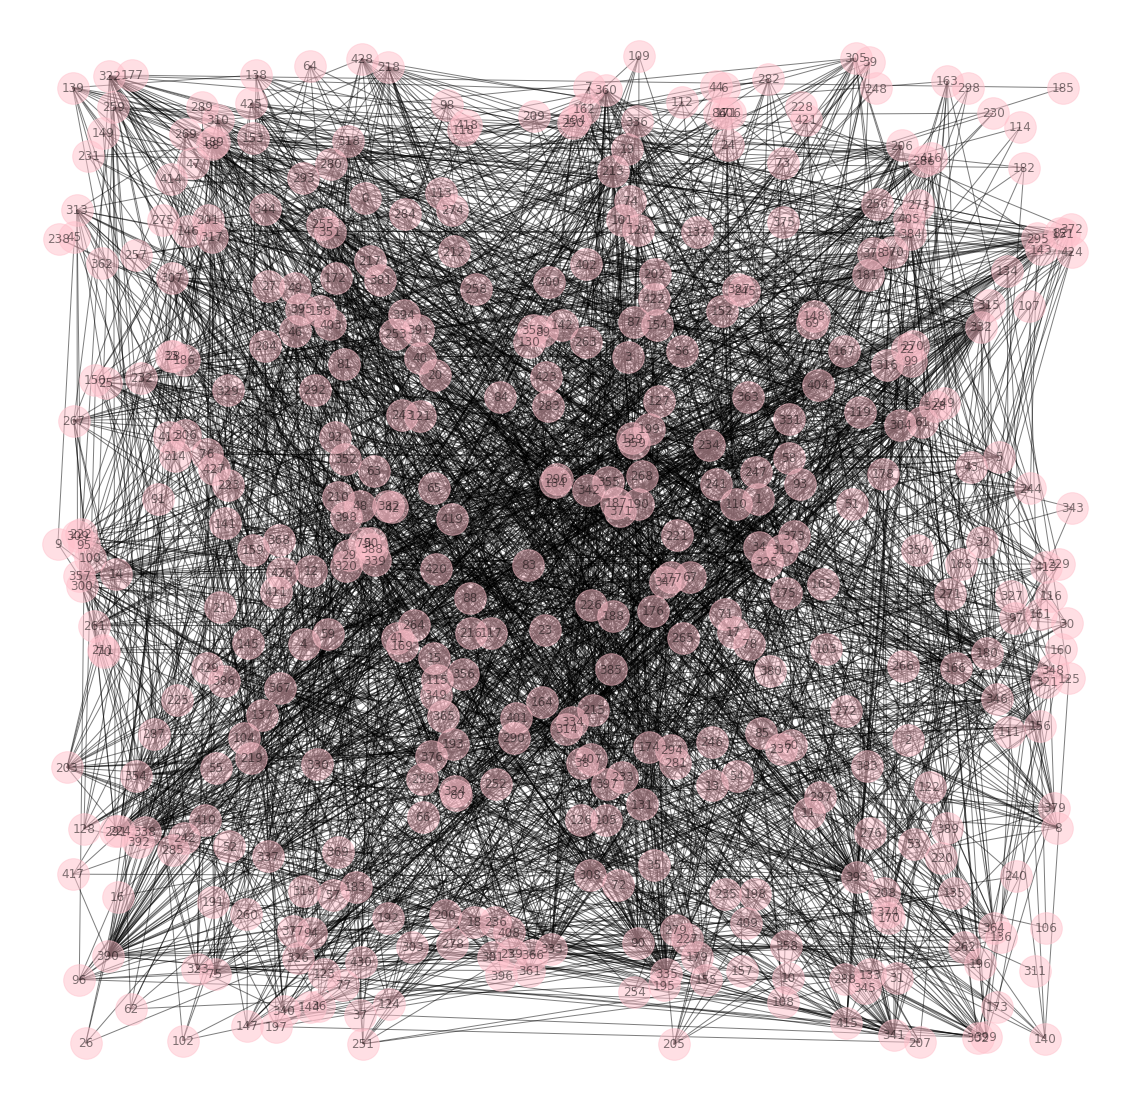

In [10]:
fig, ax = plt.subplots(figsize=(20,20))
nx.draw_random(G,with_labels=1,node_color='pink',node_size=1000, alpha=0.5, ax=ax)
plt.savefig("labels_and_colors.png") 

## Shape of the network

In [11]:
density = nx.density(G)
print("Network density:", density)

Network density: 0.029255921869098363


In [12]:
#we will not calculate shortest path for all the components , since our graph is not connected 
path = nx.shortest_path(H, source="Endless Love", target="Waterfalls")
print("Shortest path between Endless Love and Waterfalls:", path)

#shortest path between two nodes that are recommendations to each other
path = nx.shortest_path(H, source="Stayin' Alive", target="I Will Survive")
print("Shortest path between Stayin'Alive and I Will Survive:", path)

#if we try to find a shortest path between two nodes that are not connected, we get an error message
path = nx.shortest_path(H, source="Gold Digger", target="Strangers In The Night")
print("Shortest path between Gold Digger and Stayin' Alive:", path)

Shortest path between Endless Love and Waterfalls: ['Endless Love', 'Lambada', 'Every Breath You Take', 'Jump', 'Waterfalls']
Shortest path between Stayin'Alive and I Will Survive: ["Stayin' Alive", 'I Will Survive']


NodeNotFound: Either source Gold Digger or target Strangers In The Night is not in G

In [13]:
# If our Graph has more than one component, this will return False:
print(nx.is_connected(G))

False


In [14]:
print("Graph is connected =", nx.is_connected(H))
print("Number of connected components =", nx.number_connected_components(H))
print("Connected components: ")
a = 0
for i in list(nx.connected_components(H)):
    print("\n")
    print("Component ", a)
    print("\n")
    for j in i:
        print(j)
    a+=1

Graph is connected = False
Number of connected components = 23
Connected components: 


Component  0


Yeah!
Just Lose It
Gold Digger
Don't Cha
Crazy
Maria Maria
Angel
Lonely
In Da Club
The Way I Are
Low (Feat. T-Pain) (Album Version)
Shut Up
Ms. Jackson
Smack That
The Real Slim Shady
Single Ladies
Crazy In Love
Lose Yourself


Component  1


Don't Phunk With My Heart
Stronger
Umbrella
Hey Ya!
Don't Stop The Music
Fuck It (I Don't Want You Back)
We Belong Together
Love Don't Cost a Thing
Stan
Let Me Love You
Right Round
Beautiful Liar


Component  2


Hung Up
4 Minutes
Take A Bow
JUST DANCE
Poker Face
All The Things She Said
SexyBack
Hero


Component  3


Apologize
Bad Romance
I Gotta Feeling
Promiscuous


Component  4


Beautiful
Can't Get You out of My Head
Boom Boom Pow
Toxic
Bad Day
Lose My Breath
Bye Bye Bye
Big Girls Don't Cry
Oops!...I Did It Again


Component  5


Say It Right
Don't Matter
Ain't No Other Man
Beautiful Girls


Component  6


Hanging By A Moment
Boulevard Of Brok

In [15]:
# We use nx.connected_components to get the list of components
components = nx.connected_components(H)
# After that we use the max() command to find the largest one
largest_component = max(components, key=len)
print("Largest component:"+"\n")
print(largest_component)
# We create a subgraph of the largest component
subgraph = H.subgraph(largest_component)
print("")
# Then we calculate the diameter, center and radius of the subgraph
diameter = nx.diameter(subgraph)
center = nx.center(subgraph)
radius = nx.radius(subgraph)
print("Network diameter of largest component:", diameter)
print("Network center of largest component:", center)
print("Network radius of largest component:", radius)

Largest component:

{'When Doves Cry', "Sweet Child O' Mine", 'Believe', 'Relax', 'Like A Prayer', 'The Winner Takes It All', 'Streets of Philadelphia', 'Endless Love', 'Sweet Dreams (Are Made Of This)', 'Total Eclipse of the Heart', 'All I Wanna Do', 'Footloose', 'Flashdance...What a Feeling', 'Like A Virgin', 'Informer', 'Xanadu', 'Mmm Mmm Mmm Mmm', "Girl I'm Gonna Miss You", 'Billie Jean', 'Heaven Is A Place On Earth', 'The Sign', "I'll Make Love To You", '99 Red Balloons', "That's the Way Love Goes", 'Wonderwall', 'Scatman (ski-ba-bop-ba-dop-bop)', 'Batdance', 'In The Air Tonight', 'Under The Bridge', 'Barbie Girl', 'Celebration', 'The Boy Is Mine', "I'll Be Missing You (Instrumental)", "Papa Don't Preach", 'All That She Wants', 'The Power', 'Missing', 'Smells Like Teen Spirit', 'Kiss Me', 'West End Girls', 'Stars On 45: Beatles Medley', 'Physical', 'Eternal Flame', "What's Love Got To Do With It", 'Fantasy', 'All For Love', 'Upside Down', 'Need You Tonight', "Who's That Girl", 'Bl

In [16]:
triadic_closure = nx.transitivity(G)
print("Triadic closure:", triadic_closure)

Triadic closure: 0.8746912998397587


## Centrality

In [17]:
from operator import itemgetter 

degree_dict = dict(H.degree(H.nodes()))
nx.set_node_attributes(H, degree_dict, 'degree')

sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by degree:
('I Saw Mommy Kissing Santa Claus', 54)
('The Third Man Theme', 50)
('The Song from Moulin Rouge', 49)
("Let's Dance", 38)
('Good Vibrations', 35)
('Macarena', 34)
('Lambada', 34)
('A Whiter Shade Of Pale', 34)
('She Loves You', 34)
("Let's Twist Again", 34)
('All You Need Is Love', 34)
('The Twist', 34)
('I Feel Fine', 34)
('Sugar Sugar', 34)
("(You're The) Devil in Disguise", 34)
('Ticket To Ride', 34)
('In The Year 2525 (Exordius & Terminus)', 34)
('Penny Lane', 34)
('Paperback Writer', 34)
('HONKY TONK WOMEN', 34)


In [18]:
betweenness_dict = nx.betweenness_centrality(H) # Run betweenness centrality
nx.set_node_attributes(H, betweenness_dict, 'betweenness')
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by betweenness centrality:")
for b in sorted_betweenness[:20]:
    print(b)

Top 20 nodes by betweenness centrality:
('Jump', 0.06349572846917571)
('Macarena', 0.063116298289667)
('Lambada', 0.05909145169791012)
('The Boy Is Mine', 0.02189422627210141)
("I'll Make Love To You", 0.0159030530610689)
('Every Breath You Take', 0.014450119447315724)
('Theme From Shaft', 0.012501236929775374)
('Faith', 0.01212271856959656)
('Waterfalls', 0.01147287622145318)
('Ice Ice Baby', 0.01147287622145318)
('Boombastic', 0.00991979314878431)
('(Just Like) Starting Over', 0.009049656679699222)
('Centerfold', 0.009049656679699222)
("I Still Haven't Found What I'm Looking For", 0.009049656679699222)
("Sweet Child O' Mine", 0.009049656679699222)
('Nothing Compares 2 U', 0.007182142241536405)
('I Saw Mommy Kissing Santa Claus', 0.006164489856648543)
('Like A Prayer', 0.00608436177588798)
('Ebony And Ivory', 0.005380471983368045)
('The Third Man Theme', 0.00511021866915824)


In [19]:
#Get the top 20 nodes by betweenness as a list
top_betweenness = sorted_betweenness[:20]

#Find and print their degree
for tb in top_betweenness: 
    degree = degree_dict[tb[0]] 
    print("Name:", tb[0], "| Betweenness:", tb[1], "| Degree:", degree)

Name: Jump | Betweenness: 0.06349572846917571 | Degree: 32
Name: Macarena | Betweenness: 0.063116298289667 | Degree: 34
Name: Lambada | Betweenness: 0.05909145169791012 | Degree: 34
Name: The Boy Is Mine | Betweenness: 0.02189422627210141 | Degree: 13
Name: I'll Make Love To You | Betweenness: 0.0159030530610689 | Degree: 12
Name: Every Breath You Take | Betweenness: 0.014450119447315724 | Degree: 24
Name: Theme From Shaft | Betweenness: 0.012501236929775374 | Degree: 11
Name: Faith | Betweenness: 0.01212271856959656 | Degree: 14
Name: Waterfalls | Betweenness: 0.01147287622145318 | Degree: 11
Name: Ice Ice Baby | Betweenness: 0.01147287622145318 | Degree: 11
Name: Boombastic | Betweenness: 0.00991979314878431 | Degree: 9
Name: (Just Like) Starting Over | Betweenness: 0.009049656679699222 | Degree: 23
Name: Centerfold | Betweenness: 0.009049656679699222 | Degree: 23
Name: I Still Haven't Found What I'm Looking For | Betweenness: 0.009049656679699222 | Degree: 23
Name: Sweet Child O' Mi

## Community detection with modularity

In [20]:
communities = community.greedy_modularity_communities(H)

modularity_dict = {} # Create a blank dictionary
for i,c in enumerate(communities):
    for name in c:
        modularity_dict[name] = i
        

nx.set_node_attributes(H, modularity_dict, 'modularity')

for i,c in enumerate(communities): 
    if len(c) > 2: 
        print('Community '+str(i)+':', list(c)) 
        
    

Community 0: ['Bird Dog', 'Mona Lisa', 'I Believe', 'Cara Mia', 'Lonely Boy', 'The Song from Moulin Rouge', 'Diana', 'Oh Carol', 'Be My Love', 'Love Is A Many Splendoured Thing', 'Heartbreak Hotel', 'When', 'Rock Around The Clock', 'Mack The Knife', 'My Prayer', 'Blue Suede Shoes', 'Tennessee Waltz', 'Great Balls of Fire', 'Because of You', 'Long Tall Sally', 'I Need You Now', 'Pretend', 'I Saw Mommy Kissing Santa Claus', 'Three Coins in a Fountain', 'Wanted', "Little Darlin'", 'Singing The Blues', 'All I Have To Do Is Dream', 'The Third Man Theme', "Don't Be Cruel", 'Secret Love', 'The Three Bells', 'Venus', 'The Battle of New Orleans', 'This Ole House', 'Teddy Bear', 'Rags To Riches', 'Living Doll', 'Bye Bye Love', 'Delicado', 'Petite Fleur', 'Tom Dooley', 'Volare', 'Vaya Con Dios', 'Here In My Heart', "That's Amore", 'Sh-Boom', 'Tammy', 'Unforgettable', "It's All in the Game", 'Mister Sandman', 'The Great Pretender', 'All Shook Up', 'Love Me Tender', 'Music Music Music', 'Johnny B. 

## Exporting Data

In [75]:
nx.write_gexf(G, "graphG.gexf") #export graph
nx.write_gexf(H, "graphH.gexf") #export graph with labels